In [80]:
import xml.etree.ElementTree as etree
import random, math
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
#import simpy
import scipy.optimize as op
import time
import pymc3 as pm 
import pandas as pd
import theano.tensor as tt
import seaborn as sb

In [81]:
SEED = [20100425, 20100234]


data_ids = []
tester_ids = []
level_ids = []
contexts = []
left_obstacles = []
right_obstacles = []
start_lane = []
decisions = []
gender_ids = []

j = 0

In [82]:
for i in range(0,210):
    tree = etree.parse('log'+ str(i) + '.xml')
    root = tree.getroot()
    for child in root:
        if child.find('stagetype') == None:
            continue
        elif child.find('stagetype').text == 'trial':
            data_ids.append(j)
            tester_ids.append(i)
            level_ids.append(child.find('trialdescription').text)
            contexts.append(child.find('level').text)
            left_obstacles.append(child.find('leftobstacles').text)
            right_obstacles.append(child.find('rightobstacles').text)
            start_lane.append(child.find('startlane').text)
            decisions.append(child.find('answer').text)
            j += 1
        elif child.find('stagetype').text == 'q01':
            if child.find('displaytext-en').text == 'Please indicate your sex.':
                gender_ids.append(i)
    
        elif child.find('stagenumber').text == '53':
            young_preference.append(child.find('answer').text)
        elif child.find('stagenumber').text == '54':
            elderly_inverse_preference.append(child.find('answer').text)
        elif child.find('stagenumber').text == '56':
            self_preference.append(child.find('answer').text)


In [83]:
data = []

print(len(data_ids))
x = 0
for i in range(0,210):
    data.append([])

for i in range(0,4942):
    
    print(contexts[i])
    print(left_obstacles[i])
    print(right_obstacles[i])
    print("###############")
    
    left_self_value = 0
    left_old_value = 0
    left_young_value = 0
    left_man_value = 0
    left_kneeling_value = 0
    left_pavement_value = 0
    
    right_self_value = 0
    right_old_value = 0
    right_young_value = 0
    right_man_value = 0
    right_kneeling_value = 0
    right_pavement_value = 0
    
    switch_self_value = 0
    switch_old_value = 0
    switch_young_value = 0
    switch_man_value = 0
    switch_kneeling_value = 0
    switch_pavement_value = 0
    
    stay_self_value = 0
    stay_old_value = 0
    stay_young_value = 0
    stay_man_value = 0
    stay_kneeling_value = 0
    stay_pavement_value = 0
    
    
    choice = 0 
    result = []
    if contexts[i] == "mountain":
        print("in mountain")
        ### left obstacle:
        
        man_var = left_obstacles[i].split('n')
        if man_var[1] == ",":
            left_self_value = 0
            left_old_value = 0
            left_young_value = 0
            left_man_value = 1
            left_kneeling_value = 0
            left_pavement_value = 0
        else:
            man_number = man_var[1][0]
            #left = [0,0,0,int(man_number),0,0]
            left_self_value = 0
            left_old_value = 0
            left_young_value = 0
            left_man_value = int(man_number)
            left_kneeling_value = 0
            left_pavement_value = 0
        level = level_ids[i].split('.')
        if level[0] == '2':
            #right = [1,0,0,0,0,0]
            print("in self")
            right_self_value = 1

        else:
            man_var = right_obstacles[i].split('n')
            if man_var[1] == ",":
                #right_man_value = [0,0,0,1,0,0]
                right_man_value = 1
            else:
                man_number = man_var[1][0]
                #right = [0,0,0,int(man_number),0,0]
                right_man_value = int(man_number)


    elif contexts[i] == "cityr":
        print("in cityr")
        man_boy = left_obstacles[i][0]
        if man_boy == "b":
            boy_var = left_obstacles[i].split('y')
            if boy_var[1] == ",":
                #left = [0,0,1,0,0,0]
                left_young_value = 1
            else:
                boy_number = boy_var[1][0]
                #left = [0,0,int(boy_number),0,0,0]
                left_young_value = int(boy_number)
        else:
            man_var = left_obstacles[i].split('n')
            if man_var[1] == ",":
                #left = [0,0,0,1,0,0]
                left_man_value = 1
            else:
                man_number = man_var[1][0]
                #left = [0,0,0,int(man_number),0,0]
                #left = [0,0,0,1,0,0]
                left_man_value = int(man_number)

        man_var = right_obstacles[i].split('n')
        if man_var[1] == ",":
            #right = [0,0,0,1,0,1]
            right_man_value = 1
            right_pavement_value = 1
        else:
            man_number = man_var[1][0]
            #right = [0,0,0,1,0,1]
            right_man_value = int(man_number)
            right_pavement_value = 1


    elif contexts[i] == "cityl":
        print("in cityl")
        man_boy = right_obstacles[i][0]
        if man_boy == "b":
            boy_var = right_obstacles[i].split('y')
            if boy_var[1] == ",":
                #right = [0,0,1,0,0,0]
                right_young_value = 1
            else:
                boy_number = boy_var[1][0]
                #right = [0,0,int(boy_number),0,0,0]
                #right = [0,0,1,0,0,0]
                right_young_value = int(boy_number)

        else:
            man_var = right_obstacles[i].split('n')
            if man_var[1] == ",":
                #right = [0,0,0,1,0,0]
                right_pavement_value = 1
            else:
                man_number = man_var[1][0]
                #right = [0,0,0,int(man_number),0,0]
                #right = [0,0,0,1,0,0]
                right_man_value = int(man_number)

        man_var = left_obstacles[i].split('n')
        if man_var[1] == ",":
            #left = [0,0,0,1,0,1]
            left_man_value = 1
            left_pavement_value = 1

        else:
            man_number = man_var[1][0]
            #left = [0,0,0,int(man_number),0,1]	
            #left = [0,0,0,1,0,1]
            left_man_value = int(man_number)
            left_pavement_value = 1	
    else:
        print("in suburb")
        if left_obstacles[i] == "boy,":
            #left = [0,0,1,0,0,0]
            left_young_value = 1
        elif left_obstacles[i] == "oldman,":
            #eft = [0,1,0,0,0,0]
            left_old_value = 1
        elif left_obstacles[i] == "kneelingman,":
            #eft = [0,0,0,0,1,0]
            left_kneeling_value = 1
        elif left_obstacles[i] == "man,":
            #left = [0,0,0,1,0,0]
            left_man_value = 1

        if right_obstacles[i] == "boy,":
            #right = [0,0,1,0,0,0]
            right_young_value = 1
        elif right_obstacles[i] == "oldman,":
            #right = [0,1,0,0,0,0]
            right_old_value = 1
        elif right_obstacles[i] == "kneelingman,":
            #right = [0,0,0,0,1,0]
            right_kneeling_value = 1
        elif right_obstacles[i] == "man,":
            #right = [0,0,0,1,0,0]
            right_man_value = 1


    ###### switch = 1 stay = 0      
    if(decisions[i] == "right"):
        if start_lane[i] == "left":
            choice = 1
            
            switch_self_value = right_self_value
            switch_old_value = right_old_value
            switch_young_value = right_young_value
            switch_man_value = right_man_value
            switch_kneeling_value = right_kneeling_value
            switch_pavement_value = right_pavement_value
            
            stay_self_value = left_self_value
            stay_old_value = left_old_value
            stay_young_value = left_young_value
            stay_man_value = left_man_value
            stay_kneeling_value = left_kneeling_value
            stay_pavement_value = left_pavement_value
        else:
            choice = 0
            
                
            switch_self_value = left_self_value
            switch_old_value = left_old_value
            switch_young_value = left_young_value
            switch_man_value = left_man_value
            switch_kneeling_value = left_kneeling_value
            switch_pavement_value = left_pavement_value
            
            stay_self_value = right_self_value
            stay_old_value = right_old_value
            stay_young_value = right_young_value
            stay_man_value = right_man_value
            stay_kneeling_value = right_kneeling_value
            stay_pavement_value = right_pavement_value
            
            
    else:
        if start_lane[i] == "left":
            choice = 0
            
            switch_self_value = right_self_value
            switch_old_value = right_old_value
            switch_young_value = right_young_value
            switch_man_value = right_man_value
            switch_kneeling_value = right_kneeling_value
            switch_pavement_value = right_pavement_value
            
            stay_self_value = left_self_value
            stay_old_value = left_old_value
            stay_young_value = left_young_value
            stay_man_value = left_man_value
            stay_kneeling_value = left_kneeling_value
            stay_pavement_value = left_pavement_value
        else:
            choice = 1
            
            switch_old_value = left_old_value
            switch_self_value = left_self_value
            switch_young_value = left_young_value
            switch_man_value = left_man_value
            switch_kneeling_value = left_kneeling_value
            switch_pavement_value = left_pavement_value
            
            stay_self_value = right_self_value
            stay_old_value = right_old_value
            stay_young_value = right_young_value
            stay_man_value = right_man_value
            stay_kneeling_value = right_kneeling_value
            stay_pavement_value = right_pavement_value

    """result.append(data_ids[i])
    result.append(tester_ids[i])
    result.append(left)
    result.append(right)
    result.append(choice)"""
    
    if tester_ids[i] in gender_ids:
        
        if tester_ids[i] == 0:
            print("hi")
        
        elif tester_ids[i - 1] != tester_ids[i]:
            x = x + 1
        


    

        result.append(x)

        #stay
        result.append(stay_self_value)
        result.append(stay_old_value)
        result.append(stay_young_value)
        result.append(stay_man_value)
        result.append(stay_kneeling_value)
        result.append(stay_pavement_value)

        #switch
        result.append(switch_self_value)
        result.append(switch_old_value)
        result.append(switch_young_value)
        result.append(switch_man_value)
        result.append(switch_kneeling_value)
        result.append(switch_pavement_value)

        result.append(choice)


        print("###############")


        data[tester_ids[i]].append(result)

4942
suburb
boy,
kneelingman,
###############
in suburb
hi
###############
cityl
man,
man5,
###############
in cityl
hi
###############
cityr
man2,
man,
###############
in cityr
hi
###############
suburb
man,
kneelingman,
###############
in suburb
hi
###############
mountain
man6,
empty,
###############
in mountain
in self
hi
###############
mountain
man2,
empty,
###############
in mountain
in self
hi
###############
mountain
man4,
empty,
###############
in mountain
in self
hi
###############
mountain
man,
man6,
###############
in mountain
hi
###############
cityr
boy2,
man,
###############
in cityr
hi
###############
cityr
man3,
man,
###############
in cityr
hi
###############
cityl
man2,
boy,
###############
in cityl
hi
###############
cityr
man4,
man,
###############
in cityr
hi
###############
cityr
boy,
man,
###############
in cityr
hi
###############
mountain
man3,
empty,
###############
in mountain
in self
hi
###############
mountain
man7,
empty,
###############
in mountain
in s

man6,
man,
###############
in mountain
###############
mountain
man2,
empty,
###############
in mountain
in self
###############
cityl
man,
man5,
###############
in cityl
###############
mountain
man4,
empty,
###############
in mountain
in self
###############
suburb
man,
oldman,
###############
in suburb
###############
cityl
man,
man4,
###############
in cityl
###############
cityl
man2,
boy,
###############
in cityl
###############
suburb
boy,
man,
###############
in suburb
###############
suburb
kneelingman,
boy,
###############
in suburb
###############
mountain
man6,
empty,
###############
in mountain
in self
###############
suburb
oldman,
man,
###############
in suburb
###############
cityl
man,
man7,
###############
in cityl
###############
mountain
man2,
man,
###############
in mountain
###############
suburb
kneelingman,
man,
###############
in suburb
###############
cityl
man,
boy2,
###############
in cityl
###############
mountain
man,
man6,
###############
in mountain
####

man,
###############
in cityr
###############
mountain
man5,
empty,
###############
in mountain
in self
###############
suburb
man,
oldman,
###############
in suburb
###############
suburb
man,
kneelingman,
###############
in suburb
###############
mountain
man7,
empty,
###############
in mountain
in self
###############
mountain
man2,
man,
###############
in mountain
###############
mountain
man4,
empty,
###############
in mountain
in self
###############
cityl
man,
man3,
###############
in cityl
###############
cityr
man2,
man,
###############
in cityr
###############
cityr
man6,
man,
###############
in cityr
###############
cityl
man,
man4,
###############
in cityl
###############
cityl
man,
boy2,
###############
in cityl
###############
suburb
boy,
man,
###############
in suburb
###############
mountain
man3,
empty,
###############
in mountain
in self
###############
cityr
boy,
man2,
###############
in cityr
###############
suburb
oldman,
boy,
###############
in suburb
############

###############
mountain
man,
man6,
###############
in mountain
###############
cityr
boy2,
man,
###############
in cityr
###############
cityr
boy,
man2,
###############
in cityr
###############
mountain
man3,
empty,
###############
in mountain
in self
###############
mountain
man5,
empty,
###############
in mountain
in self
###############
cityl
man,
man6,
###############
in cityl
###############
mountain
man7,
empty,
###############
in mountain
in self
###############
mountain
man4,
empty,
###############
in mountain
in self
###############
mountain
man2,
empty,
###############
in mountain
in self
###############
mountain
man5,
empty,
###############
in mountain
in self
###############
cityl
man,
man5,
###############
in cityl
###############
suburb
oldman,
boy,
###############
in suburb
###############
mountain
man7,
empty,
###############
in mountain
in self
###############
mountain
man6,
empty,
###############
in mountain
in self
###############
mountain
man2,
man,
##############

cityr
man2,
man,
###############
in cityr
cityl
man2,
boy,
###############
in cityl
mountain
man2,
man,
###############
in mountain
cityr
man2,
man,
###############
in cityr
cityl
man,
man7,
###############
in cityl
suburb
oldman,
boy,
###############
in suburb
cityr
man4,
man,
###############
in cityr
suburb
boy,
man,
###############
in suburb
mountain
man4,
empty,
###############
in mountain
in self
mountain
man3,
empty,
###############
in mountain
in self
suburb
man,
oldman,
###############
in suburb
cityr
man6,
man,
###############
in cityr
suburb
kneelingman,
boy,
###############
in suburb
suburb
kneelingman,
man,
###############
in suburb
mountain
man7,
empty,
###############
in mountain
in self
mountain
man6,
man,
###############
in mountain
###############
suburb
man,
oldman,
###############
in suburb
###############
mountain
man3,
empty,
###############
in mountain
in self
###############
mountain
man2,
empty,
###############
in mountain
in self
###############
cityr
boy,
man2

man6,
empty,
###############
in mountain
in self
###############
mountain
man,
man6,
###############
in mountain
###############
suburb
oldman,
boy,
###############
in suburb
###############
cityr
man5,
man,
###############
in cityr
###############
cityr
boy,
man,
###############
in cityr
###############
suburb
boy,
man,
###############
in suburb
###############
suburb
boy,
oldman,
###############
in suburb
###############
mountain
man5,
empty,
###############
in mountain
in self
###############
mountain
man,
man2,
###############
in mountain
###############
suburb
oldman,
kneelingman,
###############
in suburb
###############
cityr
boy2,
man,
###############
in cityr
###############
suburb
man,
kneelingman,
###############
in suburb
###############
cityr
man3,
man,
###############
in cityr
###############
mountain
man,
man4,
###############
in mountain
###############
mountain
man6,
empty,
###############
in mountain
in self
###############
mountain
man,
man6,
###############
in mount

###############
in cityr
###############
suburb
boy,
oldman,
###############
in suburb
###############
mountain
man7,
empty,
###############
in mountain
in self
###############
mountain
man6,
empty,
###############
in mountain
in self
###############
mountain
man6,
man,
###############
in mountain
###############
cityr
man3,
man,
###############
in cityr
###############
mountain
man4,
empty,
###############
in mountain
in self
###############
mountain
man,
man2,
###############
in mountain
###############
suburb
kneelingman,
man,
###############
in suburb
###############
cityl
man,
man2,
###############
in cityl
###############
cityr
man7,
man,
###############
in cityr
###############
cityr
man4,
man,
###############
in cityr
###############
cityr
man6,
man,
###############
in cityr
###############
suburb
boy,
kneelingman,
###############
in suburb
###############
cityr
boy,
man2,
###############
in cityr
###############
mountain
man5,
empty,
###############
in mountain
in self
#######

###############
mountain
man2,
empty,
###############
in mountain
in self
###############
mountain
man2,
man,
###############
in mountain
###############
mountain
man6,
man,
###############
in mountain
###############
suburb
kneelingman,
oldman,
###############
in suburb
###############
mountain
man6,
man,
###############
in mountain
###############
suburb
boy,
man,
###############
in suburb
###############
suburb
oldman,
boy,
###############
in suburb
###############
suburb
kneelingman,
oldman,
###############
in suburb
###############
cityl
man,
man4,
###############
in cityl
###############
mountain
man7,
empty,
###############
in mountain
in self
###############
suburb
kneelingman,
boy,
###############
in suburb
###############
cityr
man3,
man,
###############
in cityr
###############
cityr
boy,
man,
###############
in cityr
###############
cityl
man,
man6,
###############
in cityl
###############
mountain
man4,
empty,
###############
in mountain
in self
###############
mountain
ma

###############
suburb
oldman,
man,
###############
in suburb
###############
suburb
man,
kneelingman,
###############
in suburb
###############
cityl
man,
boy2,
###############
in cityl
###############
cityl
man,
man2,
###############
in cityl
###############
cityl
man,
boy,
###############
in cityl
###############
mountain
man4,
man,
###############
in mountain
###############
cityl
man2,
boy,
###############
in cityl
###############
suburb
boy,
man,
###############
in suburb
###############
suburb
kneelingman,
boy,
###############
in suburb
###############
cityr
man3,
man,
###############
in cityr
###############
mountain
man6,
man,
###############
in mountain
###############
mountain
man6,
empty,
###############
in mountain
in self
###############
mountain
man4,
empty,
###############
in mountain
in self
###############
suburb
kneelingman,
boy,
###############
in suburb
###############
mountain
man,
man4,
###############
in mountain
###############
cityl
man,
man7,
###############


man,
###############
in cityr
###############
mountain
man6,
empty,
###############
in mountain
in self
###############
cityl
man,
man2,
###############
in cityl
###############
cityr
man5,
man,
###############
in cityr
###############
cityl
man,
man3,
###############
in cityl
###############
suburb
oldman,
kneelingman,
###############
in suburb
###############
cityl
man,
boy2,
###############
in cityl
###############
mountain
man,
man4,
###############
in mountain
###############
suburb
boy,
man,
###############
in suburb
###############
mountain
man3,
empty,
###############
in mountain
in self
###############
cityr
man4,
man,
###############
in cityr
###############
mountain
man,
man2,
###############
in mountain
###############
mountain
man5,
empty,
###############
in mountain
in self
###############
mountain
man5,
empty,
###############
in mountain
in self
###############
suburb
man,
kneelingman,
###############
in suburb
###############
mountain
man7,
empty,
###############
in mou

suburb
kneelingman,
man,
###############
in suburb
###############
mountain
man2,
empty,
###############
in mountain
in self
###############
suburb
man,
boy,
###############
in suburb
###############
mountain
man2,
man,
###############
in mountain
###############
cityr
man4,
man,
###############
in cityr
###############
cityl
man,
boy,
###############
in cityl
###############
suburb
oldman,
boy,
###############
in suburb
###############
mountain
man,
man6,
###############
in mountain
###############
mountain
man4,
empty,
###############
in mountain
in self
###############
mountain
man6,
empty,
###############
in mountain
in self
###############
cityr
boy,
man2,
###############
in cityr
###############
cityl
man,
man2,
###############
in cityl
###############
cityl
man,
man6,
###############
in cityl
###############
mountain
man3,
empty,
###############
in mountain
in self
###############
mountain
man5,
empty,
###############
in mountain
in self
###############
cityl
man,
man5,
########

###############
suburb
boy,
oldman,
###############
in suburb
###############
cityl
man,
man6,
###############
in cityl
###############
mountain
man5,
empty,
###############
in mountain
in self
###############
mountain
man3,
empty,
###############
in mountain
in self
###############
cityl
man,
man7,
###############
in cityl
###############
cityl
man,
boy2,
###############
in cityl
###############
cityr
man4,
man,
###############
in cityr
###############
mountain
man,
man4,
###############
in mountain
###############
suburb
boy,
man,
###############
in suburb
###############
suburb
oldman,
boy,
###############
in suburb
###############
suburb
man,
kneelingman,
###############
in suburb
###############
cityl
man,
man2,
###############
in cityl
###############
cityl
man2,
boy,
###############
in cityl
###############
suburb
man,
oldman,
###############
in suburb
###############
suburb
kneelingman,
boy,
###############
in suburb
###############
mountain
man4,
empty,
###############
in moun

###############
in mountain
in self
###############
cityr
man3,
man,
###############
in cityr
###############
mountain
man5,
empty,
###############
in mountain
in self
###############
mountain
man,
man2,
###############
in mountain
###############
suburb
boy,
kneelingman,
###############
in suburb
###############
cityr
boy,
man,
###############
in cityr
###############
mountain
man6,
empty,
###############
in mountain
in self
###############
cityl
man,
man6,
###############
in cityl
###############
suburb
boy,
oldman,
###############
in suburb
###############
mountain
man4,
man,
###############
in mountain
###############
mountain
man4,
empty,
###############
in mountain
in self
###############
suburb
oldman,
man,
###############
in suburb
###############
cityr
boy2,
man,
###############
in cityr
###############
cityl
man,
man7,
###############
in cityl
###############
suburb
kneelingman,
oldman,
###############
in suburb
###############
mountain
man3,
empty,
###############
in mountai

in mountain
in self
###############
suburb
kneelingman,
man,
###############
in suburb
###############
mountain
man,
man6,
###############
in mountain
###############
mountain
man6,
empty,
###############
in mountain
in self
###############
cityr
man6,
man,
###############
in cityr
###############
mountain
man7,
empty,
###############
in mountain
in self
###############
suburb
kneelingman,
boy,
###############
in suburb
###############
cityr
man4,
man,
###############
in cityr
###############
mountain
man5,
empty,
###############
in mountain
in self
###############
cityr
boy,
man,
###############
in cityr
###############
mountain
man,
man2,
###############
in mountain
###############
mountain
man,
man6,
###############
in mountain
###############
mountain
man4,
man,
###############
in mountain
###############
cityr
man2,
man,
###############
in cityr
###############
cityl
man,
man5,
###############
in cityl
###############
mountain
man4,
empty,
###############
in mountain
in self
#####

in suburb
###############
mountain
man,
man6,
###############
in mountain
###############
mountain
man6,
empty,
###############
in mountain
in self
###############
cityr
man6,
man,
###############
in cityr
###############
cityl
man,
boy,
###############
in cityl
###############
suburb
oldman,
kneelingman,
###############
in suburb
###############
cityr
boy,
man2,
###############
in cityr
###############
suburb
man,
boy,
###############
in suburb
###############
mountain
man4,
empty,
###############
in mountain
in self
###############
mountain
man6,
man,
###############
in mountain
###############
mountain
man4,
man,
###############
in mountain
###############
cityl
man,
man3,
###############
in cityl
###############
mountain
man7,
empty,
###############
in mountain
in self
###############
suburb
man,
kneelingman,
###############
in suburb
###############
mountain
man2,
empty,
###############
in mountain
in self
###############
suburb
man,
oldman,
###############
in suburb
#############

boy,
man,
###############
in cityr
###############
suburb
oldman,
kneelingman,
###############
in suburb
###############
suburb
man,
kneelingman,
###############
in suburb
###############
suburb
oldman,
man,
###############
in suburb
###############
mountain
man4,
man,
###############
in mountain
###############
cityr
man5,
man,
###############
in cityr
###############
mountain
man6,
empty,
###############
in mountain
in self
###############
suburb
oldman,
kneelingman,
###############
in suburb
###############
cityl
man,
boy2,
###############
in cityl
###############
cityr
man4,
man,
###############
in cityr
###############
suburb
kneelingman,
man,
###############
in suburb
###############
mountain
man3,
empty,
###############
in mountain
in self
###############
suburb
boy,
man,
###############
in suburb
###############
cityl
man,
man3,
###############
in cityl
###############
cityr
man2,
man,
###############
in cityr
###############
mountain
man4,
empty,
###############
in mountain
in

###############
mountain
man2,
empty,
###############
in mountain
in self
###############
cityl
man,
man2,
###############
in cityl
###############
mountain
man,
man4,
###############
in mountain
###############
mountain
man3,
empty,
###############
in mountain
in self
###############
cityl
man,
boy,
###############
in cityl
###############
suburb
man,
kneelingman,
###############
in suburb
###############
suburb
oldman,
man,
###############
in suburb
###############
mountain
man2,
empty,
###############
in mountain
in self
###############
mountain
man5,
empty,
###############
in mountain
in self
###############
cityl
man,
boy2,
###############
in cityl
###############
cityl
man,
man3,
###############
in cityl
###############
suburb
kneelingman,
oldman,
###############
in suburb
###############
mountain
man6,
empty,
###############
in mountain
in self
###############
suburb
boy,
man,
###############
in suburb
###############
cityr
man6,
man,
###############
in cityr
###############
sub

###############
in mountain
in self
###############
suburb
man,
oldman,
###############
in suburb
###############
suburb
boy,
oldman,
###############
in suburb
###############
suburb
kneelingman,
boy,
###############
in suburb
###############
cityl
man,
man2,
###############
in cityl
###############
mountain
man6,
man,
###############
in mountain
###############
mountain
man3,
empty,
###############
in mountain
in self
###############
cityl
man,
boy2,
###############
in cityl
###############
mountain
man6,
empty,
###############
in mountain
in self
###############
mountain
man2,
empty,
###############
in mountain
in self
###############
suburb
man,
boy,
###############
in suburb
###############
cityr
man5,
man,
###############
in cityr
###############
cityr
man7,
man,
###############
in cityr
###############
mountain
man5,
empty,
###############
in mountain
in self
###############
cityl
man,
man4,
###############
in cityl
###############
suburb
oldman,
kneelingman,
###############
in s

in mountain
###############
suburb
boy,
oldman,
###############
in suburb
###############
cityr
man6,
man,
###############
in cityr
###############
cityl
man,
man2,
###############
in cityl
###############
cityl
man,
man3,
###############
in cityl
###############
mountain
man,
man4,
###############
in mountain
###############
suburb
kneelingman,
oldman,
###############
in suburb
###############
suburb
kneelingman,
boy,
###############
in suburb
###############
cityl
man,
boy,
###############
in cityl
###############
mountain
man6,
empty,
###############
in mountain
in self
###############
suburb
man,
oldman,
###############
in suburb
###############
suburb
man,
oldman,
###############
in suburb
###############
suburb
kneelingman,
boy,
###############
in suburb
###############
cityl
man,
boy,
###############
in cityl
###############
mountain
man6,
empty,
###############
in mountain
in self
###############
mountain
man4,
man,
###############
in mountain
###############
suburb
kneelingman

in suburb
###############
cityl
man,
man3,
###############
in cityl
###############
suburb
oldman,
kneelingman,
###############
in suburb
###############
cityl
man,
man5,
###############
in cityl
###############
cityr
boy,
man2,
###############
in cityr
###############
mountain
man3,
empty,
###############
in mountain
in self
###############
mountain
man5,
empty,
###############
in mountain
in self
###############
cityr
man4,
man,
###############
in cityr
###############
mountain
man2,
man,
###############
in mountain
###############
cityr
boy,
man,
###############
in cityr
###############
suburb
kneelingman,
boy,
###############
in suburb
###############
mountain
man2,
empty,
###############
in mountain
in self
###############
cityr
man7,
man,
###############
in cityr
###############
mountain
man,
man4,
###############
in mountain
###############
mountain
man7,
empty,
###############
in mountain
in self
###############
suburb
boy,
oldman,
###############
in suburb
###############
city

###############
in suburb
###############
mountain
man,
man2,
###############
in mountain
###############
mountain
man,
man4,
###############
in mountain
###############
suburb
oldman,
man,
###############
in suburb
###############
cityl
man,
man2,
###############
in cityl
###############
mountain
man6,
empty,
###############
in mountain
in self
###############
cityr
man3,
man,
###############
in cityr
###############
mountain
man6,
man,
###############
in mountain
###############
cityl
man,
boy,
###############
in cityl
###############
cityr
man5,
man,
###############
in cityr
###############
suburb
boy,
oldman,
###############
in suburb
###############
cityr
boy,
man2,
###############
in cityr
###############
cityr
boy2,
man,
###############
in cityr
###############
suburb
kneelingman,
man,
###############
in suburb
###############
mountain
man3,
empty,
###############
in mountain
in self
###############
mountain
man4,
empty,
###############
in mountain
in self
###############
mounta

In [84]:
data_orig = []

for i in range(0,len(data)):
    if data[i] == []:
        print(i)
        continue
    else:
        data_orig.append([])

x = 0

for i in range(0,len(data)):
    if data[i] == []:
        continue
    else:
        for j in data[i]:            
            data_orig[x].append(j)
        x = x + 1
    
for j in data_orig:
    print(j)

20
25
34
38
39
42
55
57
164
[[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1], [0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 1, 0, 1, 1], [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 1], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 1], [0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 4, 0, 0, 1, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 1, 0, 0, 1], [0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1], [0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 1, 1], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1], [0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 1, 0, 1, 1], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1], [0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 7, 0, 0, 1, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 1, 0, 1, 1], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 1, 0, 0, 1], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0], [0,

[[104, 0, 0, 0, 7, 0, 0, 0, 0, 0, 1, 0, 1, 1], [104, 0, 0, 0, 6, 0, 0, 0, 0, 0, 1, 0, 1, 1], [104, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1], [104, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1], [104, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 1, 1], [104, 1, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0], [104, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0], [104, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0], [104, 0, 0, 0, 5, 0, 0, 0, 0, 0, 1, 0, 1, 1], [104, 1, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0], [104, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [104, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1], [104, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1], [104, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0], [104, 0, 0, 0, 4, 0, 0, 0, 0, 0, 1, 0, 0, 1], [104, 0, 0, 0, 4, 0, 0, 0, 0, 0, 1, 0, 1, 1], [104, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0], [104, 0, 0, 0, 5, 0, 0, 1, 0, 0, 0, 0, 0, 1], [104, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0], [104, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 1], [104, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0], [104, 0, 0, 0, 1, 0, 0, 0, 0, 0, 

In [85]:
data = []
data_new_test = []

for i in data_orig:
    for j in range(len(i)):
        if j % 2 != 0:
            data.append(i[j])
        else:
            data_new_test.append(i[j])



In [86]:
data_test = []

for j in range(0,len(data)):
    for i in data[j]:
        data_test.append(i)

print(len(data_test))

33768


In [87]:
new_data = np.array(data_test).reshape(int(len(data_test)/14),14)


a = "t"
b = "stay_sv"
c = "stay_ov"
d = "stay_yv"
e = "stay_mv"
f = "stay_kv"
g = "stay_pv"

h = "switch_sv"
i = "switch_ov"
j = "switch_yv"
k = "switch_mv"
l = "switch_kv"
m = "switch_pv"
n = "c"

l = [a,b,c,d,e,f,g,h,i,j,k,l,m,n]

df = pd.DataFrame(new_data, columns = l)


indiv_traces = {}



#c_data = df.loc[df['t'] == 0]
c_data = df
c_data = c_data.reset_index(drop=True)

stay_sv = c_data["stay_sv"]
stay_ov = c_data["stay_ov"]
stay_yv = c_data["stay_yv"]
stay_mv = c_data["stay_mv"]
stay_kv = c_data["stay_kv"]
stay_pv = c_data["stay_pv"]


switch_sv = c_data["switch_sv"]
switch_ov = c_data["switch_ov"]
switch_yv = c_data["switch_yv"]
switch_mv = c_data["switch_mv"]
switch_kv = c_data["switch_kv"]
switch_pv = c_data["switch_pv"]

choice = c_data["c"]

print(c_data)

n_testers = len(c_data['t'].unique())
#n_testers = 160
testers_idx = c_data['t'].values
n_tests = len(c_data['c'])
print(n_testers)

        t  stay_sv  stay_ov  stay_yv  stay_mv  stay_kv  stay_pv  switch_sv  \
0       0        0        0        0        5        0        0          0   
1       0        0        0        0        1        0        0          0   
2       0        0        0        0        2        0        0          1   
3       0        0        0        0        6        0        0          0   
4       0        0        0        0        3        0        0          0   
5       0        0        0        0        4        0        0          0   
6       0        0        0        0        3        0        0          1   
7       0        0        0        0        0        1        0          0   
8       0        0        0        0        1        0        0          0   
9       0        0        1        0        0        0        0          0   
10      0        1        0        0        0        0        0          0   
11      0        0        1        0        0        0        0 

In [88]:
print('hello')
#switch = (B0 * stay_sv) + (B1 * stay_ov) + (B2 * stay_yv) + (B3 * stay_mv) + (B4 * stay_kv) + (B5 * stay_pv)
#stay = (B0 * switch_sv) + (B1 * switch_ov) + (B2 * switch_yv) + (B3 * switch_mv) + (B4 * switch_kv) + (B5 * switch_pv)

hello


In [89]:
def invlogit(x):
    return 1 / (1 + np.exp(-x))


with pm.Model() as logistic_model:
    
    sd_dist = pm.Normal.dist(mu=1, sd=0.1, shape=(6))
    #sd_dist = pm.HalfCauchy.dist(2.5)

    chol_packed = pm.LKJCholeskyCov('chol_packed', n=6, eta=2, sd_dist=sd_dist)
    chol = pm.expand_packed_triangular(6,chol_packed)
    cov = pm.Deterministic('cov', chol.dot(chol.T))
    sad = pm.Deterministic('sad', tt.sqrt(tt.diag(cov)))
    corr = pm.Deterministic('corr', tt.diag(sad**-1).dot(cov.dot(tt.diag(sad**-1))))
    
    chol_packed_group = pm.LKJCholeskyCov('chol_packed_group', n=6, eta=2, sd_dist=sd_dist)
    chol_group = pm.expand_packed_triangular(6,chol_packed_group)
    cov_group = pm.Deterministic('cov_group', chol_group.dot(chol_group.T))
    sad_group = pm.Deterministic('sad_group', tt.sqrt(tt.diag(cov_group)))
    corr_group = pm.Deterministic('corr_group', tt.diag(sad_group**-1).dot(cov_group.dot(tt.diag(sad_group**-1))))
    
    #chosen_sd = pm.HalfCauchy('chosen_sd', 10)
    #closer_sd = pm.HalfCauchy('closer_sd', 2.5)
    
    
    self_group_prior = pm.StudentT('self_group_prior',nu=2, mu=0., sd=1)
    old_group_prior = pm.StudentT('old_group_prior', nu=2, mu=0., sd=1)
    young_group_prior = pm.StudentT('young_group_prior', nu=2, mu=0., sd=1)
    man_group_prior = pm.StudentT('man_group_prior', nu=2, mu=0., sd=1)
    kneeling_group_prior = pm.StudentT('kneeling_group_prior', nu=2, mu=0., sd=1)
    pavement_group_prior = pm.StudentT('pavement_group_prior', nu=2, mu=0., sd=1)
    
    
    priors_raw = tt.concatenate([[self_group_prior], [old_group_prior], [young_group_prior], [man_group_prior], [kneeling_group_prior], [pavement_group_prior]])
    priors_raw_ = priors_raw.T
    priors_group = pm.Deterministic('priors_group', tt.dot(priors_raw,chol_group))
    priors_group = tt.reshape(priors_group, (1,6))
   
    
    B0 = pm.StudentT('B0',nu=5,mu=priors_group[0,0], sd=1, shape=n_testers)
    B1 = pm.StudentT('B1',nu=5,mu=priors_group[0,1], sd=1, shape=n_testers)
    B2 = pm.StudentT('B2',nu=5,mu=priors_group[0,2], sd=1, shape=n_testers)
    B3 = pm.StudentT('B3',nu=5,mu=priors_group[0,3], sd=1, shape=n_testers)
    B4 = pm.StudentT('B4',nu=5,mu=priors_group[0,4], sd=1, shape=n_testers)
    B5 = pm.StudentT('B5',nu=5,mu=priors_group[0,5], sd=1, shape=n_testers)
    
    
    vals_raw = tt.concatenate([[B0], [B1], [B2], [B3], [B4], [B5]])
    vals_raw = vals_raw.T
    priors = pm.Deterministic('priors', tt.dot(vals_raw,chol))
    priors = tt.reshape(priors, (n_testers,6))
    

    switch_utility = pm.Deterministic('switch_utility', ((priors[testers_idx,0] * stay_sv) + (priors[testers_idx,1] * stay_ov) + (priors[testers_idx,2] * stay_yv) + (priors[testers_idx,3] * stay_mv) + (priors[testers_idx,4] * stay_kv) + (priors[testers_idx,5] * stay_pv) ))
    stay_utility = pm.Deterministic('stay_utility', ((priors[testers_idx,0] * switch_sv) + (priors[testers_idx,1] * switch_ov) + (priors[testers_idx,2] * switch_yv) + (priors[testers_idx,3] * switch_mv) + (priors[testers_idx,4] * switch_kv) + (priors[testers_idx,5] * switch_pv) ))   
    
    overall_utility = pm.Deterministic('overall_utility', switch_utility - stay_utility)
    
    p = invlogit(overall_utility)

    
    y_obs = pm.Bernoulli('y_obs', p=p, observed=choice)

        
    #start = pm.find_MAP(model=logistic_model)
    #trace_logistic_model = pm.sample(500, start = start, chains=2, tune=500,
                         #nuts_kwargs=dict(target_accept=.8))
    trace_logistic_model = pm.sample(1000, chains=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [B5, B4, B3, B2, B1, B0, pavement_group_prior, kneeling_group_prior, man_group_prior, young_group_prior, old_group_prior, self_group_prior, chol_packed_group_cholesky_cov_packed__, chol_packed_cholesky_cov_packed__]
100%|██████████| 1500/1500 [18:01<00:00,  1.39it/s]
/Users/tortysivill/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
/Users/tortysivill/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(

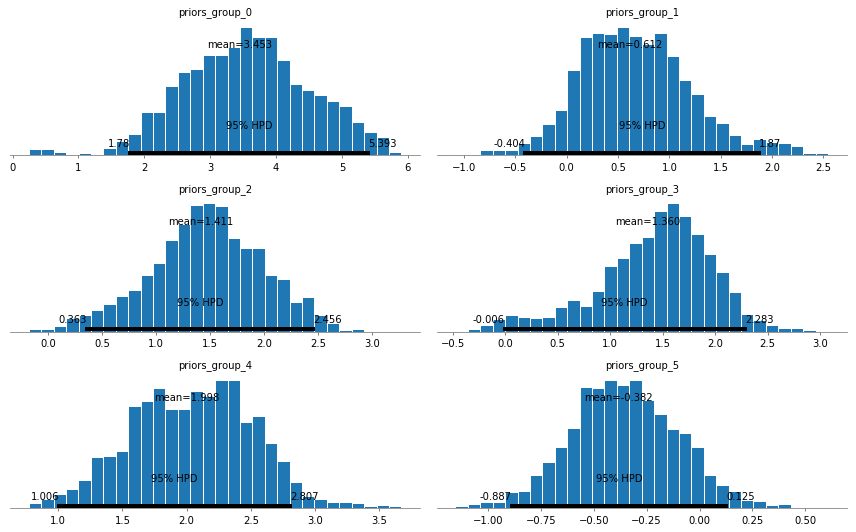

In [90]:

#pm.plot_posterior(trace_logistic_model,varnames=['priors_group[0]', 'priors_group[1]','priors_group[2]', 'priors_group[3]', 'priors_group[4]', 'priors_group[5]'])


pm.plot_posterior(trace_logistic_model,varnames=['priors_group'])


plt.show()

In [91]:
variance_waic = pm.waic(trace_logistic_model, logistic_model)

print(variance_waic.WAIC)

1660.8375998591498


/Users/tortysivill/Downloads/LogFiles 2/pymc3/pymc3/stats.py:211: UserWarning: For one or more samples the posterior variance of the
        log predictive densities exceeds 0.4. This could be indication of
        WAIC starting to fail see http://arxiv.org/abs/1507.04544 for details
        
  """)


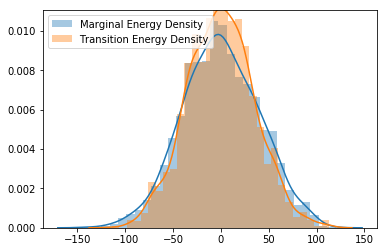

In [92]:
import seaborn as sb
energy = trace_logistic_model['energy']
energy_diff = np.diff(energy)
sb.distplot(energy - energy.mean(), label='Marginal Energy Density')
sb.distplot(energy_diff, label='Transition Energy Density')
plt.legend()
plt.show()

In [93]:
young_mean = np.mean(trace_logistic_model['young_group_prior'])
old_mean = np.mean(trace_logistic_model['old_group_prior'])
self_mean = np.mean(trace_logistic_model['self_group_prior'])
kneeling_mean = np.mean(trace_logistic_model['kneeling_group_prior'])
pavement_mean = np.mean(trace_logistic_model['pavement_group_prior'])
man_mean = np.mean(trace_logistic_model['man_group_prior'])


In [94]:
min_value = min(young_mean, old_mean, self_mean, kneeling_mean, pavement_mean, man_mean)
max_value = max(young_mean, old_mean, self_mean, kneeling_mean, pavement_mean, man_mean)
diff_value = max_value - min_value

young_mean = (young_mean - min_value)/diff_value
old_mean = (old_mean - min_value)/diff_value
self_mean = (self_mean - min_value)/diff_value
kneeling_mean = (kneeling_mean - min_value)/diff_value
pavement_mean = (pavement_mean - min_value)/diff_value
man_mean = (man_mean - min_value)/diff_value






In [95]:
results = trace_logistic_model['priors']
results = results.transpose()

self_results = results[0].mean(axis=1)
old_results = results[1].mean(axis=1)
young_results = results[2].mean(axis=1)
man_results = results[3].mean(axis=1)
kneeling_results = results[4].mean(axis=1)
pavement_results = results[5].mean(axis=1)




"""self_results = trace_logistic_model['B0'].mean(axis=0)
old_results = trace_logistic_model['B1'].mean(axis=0)
young_results = trace_logistic_model['B2'].mean(axis=0)
man_results = trace_logistic_model['B3'].mean(axis=0)
kneeling_results = trace_logistic_model['B4'].mean(axis=0)
pavement_results = trace_logistic_model['B5'].mean(axis=0)"""





complete_results = np.asarray((self_results, old_results, young_results, man_results, kneeling_results, pavement_results))
complete_results = complete_results.transpose()
complete_results = np.reshape(complete_results, (n_testers,6))

In [96]:
print(complete_results)
print(complete_results[0,0])

[[ 3.0043431   0.33187751  3.46363207  1.37773226  1.33790632 -0.43268769]
 [ 3.70976233 -0.37265691  3.97514081  1.34541933  1.49365545 -0.72510976]
 [ 3.41492111  1.26865074  0.42668619  0.66843324  0.9735774  -0.10962131]
 ...
 [ 3.26158181 -0.52152836  4.11989451  1.42188074  1.53840292 -0.74277448]
 [ 3.54155424  0.6205773   0.4264429  -0.13508069  0.7876347   0.90631713]
 [ 1.45381458  0.5107471   3.90530646  1.55833303  1.77778648 -0.22398297]]
3.0043430980059984


In [97]:
test_data_ids = []
test_tester_ids = []
test_level_ids = []
test_contexts = []
test_left_obstacles = []
test_right_obstacles = []
test_decisions = []
test_start_lane = []

In [98]:
data_new_test_formatted = []

for i in range(0,n_testers):
    data_new_test_formatted.append([])

    
for j in data_new_test:
    data_new_test_formatted[j[0]].append(j)
    
print(data_new_test_formatted)

[[[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1], [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 1], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 1], [0, 0, 0, 0, 4, 0, 0, 1, 0, 0, 0, 0, 0, 1], [0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1], [0, 0, 0, 0, 7, 0, 0, 1, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 1, 0, 1, 1], [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 1, 0, 0, 1], [0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 1, 0, 1, 1]], [[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0], [1, 0, 0, 0, 6, 0, 0, 0, 0, 0, 1, 0, 0, 1], [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1], [1, 0, 0, 0, 5, 0, 0, 0, 0, 0, 1, 0, 1, 1], [1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 1], [1, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 1], [1, 0, 0, 0, 7, 0, 0, 0, 0, 0, 1, 0, 1, 1], [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0], [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0], [1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1], [1, 0, 1, 0, 0, 0, 0, 0, 0, 

In [99]:

j = 0
truth_decisions = []
predictions = []
contexts = []
left = []
right = []
for j in range(0,n_testers):
    self_weight = complete_results[j,0]
    old_weight = complete_results[j,1]
    young_weight =complete_results[j,2]
    man_weight = complete_results[j,3]
    kneeling_weight = complete_results[j,4]
    pavement_weight = complete_results[j,5]
    
    min_value = min(young_weight, old_weight, self_weight, kneeling_weight, pavement_weight, man_weight)
    max_value = max(young_weight, old_weight, self_weight, kneeling_weight, pavement_weight, man_weight)
    diff_value = max_value - min_value

    young_weight = (young_weight - min_value)/diff_value
    old_weight = (old_weight - min_value)/diff_value
    self_weight = (self_weight - min_value)/diff_value
    kneeling_weight = (kneeling_weight - min_value)/diff_value
    pavement_weight = (pavement_weight - min_value)/diff_value
    man_weight = (man_weight - min_value)/diff_value

    for i in data_new_test_formatted[j]:
        stay_matrix = [i[1],i[2],i[3],i[4],i[5],i[6]]
        switch_matrix = [i[7],i[8],i[9],i[10],i[11],i[12]]
        
        print(stay_matrix)
        print(switch_matrix)
        print(i[13])
        print("#########")
        
        stay_utility = self_weight*switch_matrix[0] + old_weight*switch_matrix[1] + young_weight*switch_matrix[2] + man_weight*switch_matrix[3] + kneeling_weight*switch_matrix[4] + pavement_weight*switch_matrix[5]
        switch_utility = self_weight*stay_matrix[0] + old_weight*stay_matrix[1] + young_weight*stay_matrix[2] + man_weight*stay_matrix[3] + kneeling_weight*stay_matrix[4] + pavement_weight*stay_matrix[5]
        
        overall_utility1 = switch_utility - stay_utility
        overall_utility2 = stay_utility - switch_utility
        
        probability1 = 1/(1 + np.exp(-overall_utility1))
        probability2 = 1/(1 + np.exp(-overall_utility2))
                         
        if probability1 > probability2:
            predictions.append(1)
        else:
            predictions.append(0)

        truth_decisions.append(i[13])
        #contexts.append(i[5])
        #left.append(left_matrix)
        #right.append(right_matrix)

[0, 0, 1, 0, 0, 0]
[0, 0, 0, 0, 1, 0]
1
#########
[0, 0, 0, 2, 0, 0]
[0, 0, 0, 1, 0, 1]
1
#########
[1, 0, 0, 0, 0, 0]
[0, 0, 0, 6, 0, 0]
1
#########
[0, 0, 0, 4, 0, 0]
[1, 0, 0, 0, 0, 0]
1
#########
[0, 0, 2, 0, 0, 0]
[0, 0, 0, 1, 0, 1]
1
#########
[0, 0, 1, 0, 0, 0]
[0, 0, 0, 2, 0, 1]
1
#########
[0, 0, 1, 0, 0, 0]
[0, 0, 0, 1, 0, 1]
1
#########
[0, 0, 0, 7, 0, 0]
[1, 0, 0, 0, 0, 0]
1
#########
[0, 0, 0, 6, 0, 0]
[0, 0, 0, 1, 0, 1]
1
#########
[0, 0, 0, 1, 0, 0]
[0, 0, 1, 0, 0, 0]
0
#########
[0, 0, 0, 4, 0, 0]
[0, 0, 0, 1, 0, 0]
1
#########
[0, 0, 0, 7, 0, 0]
[0, 0, 0, 1, 0, 1]
1
#########
[1, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0]
0
#########
[0, 0, 0, 6, 0, 0]
[0, 0, 0, 1, 0, 0]
1
#########
[0, 0, 1, 0, 0, 0]
[0, 0, 0, 1, 0, 1]
1
#########
[0, 0, 0, 5, 0, 0]
[0, 0, 0, 1, 0, 1]
1
#########
[0, 0, 0, 2, 0, 0]
[0, 0, 0, 1, 0, 1]
1
#########
[0, 0, 0, 3, 0, 0]
[1, 0, 0, 0, 0, 0]
1
#########
[0, 0, 0, 7, 0, 0]
[0, 0, 0, 1, 0, 1]
1
#########
[1, 0, 0, 0, 0, 0]
[0, 0, 0, 5, 0, 0]
0
#########


1
#########
[0, 0, 0, 4, 0, 0]
[1, 0, 0, 0, 0, 0]
0
#########
[0, 0, 0, 6, 0, 0]
[0, 0, 0, 1, 0, 1]
1
#########
[0, 0, 0, 7, 0, 0]
[1, 0, 0, 0, 0, 0]
0
#########
[0, 0, 0, 5, 0, 0]
[0, 0, 0, 1, 0, 1]
1
#########
[0, 0, 0, 7, 0, 0]
[0, 0, 0, 1, 0, 1]
1
#########
[0, 0, 0, 0, 1, 0]
[0, 1, 0, 0, 0, 0]
1
#########
[0, 0, 1, 0, 0, 0]
[0, 0, 0, 1, 0, 1]
1
#########
[0, 0, 0, 1, 0, 0]
[0, 1, 0, 0, 0, 0]
0
#########
[1, 0, 0, 0, 0, 0]
[0, 0, 0, 7, 0, 0]
1
#########
[0, 0, 0, 4, 0, 0]
[1, 0, 0, 0, 0, 0]
0
#########
[0, 0, 0, 2, 0, 0]
[0, 0, 0, 1, 0, 1]
1
#########
[0, 0, 0, 4, 0, 0]
[0, 0, 0, 1, 0, 1]
1
#########
[0, 0, 1, 0, 0, 0]
[0, 0, 0, 1, 0, 0]
1
#########
[0, 0, 1, 0, 0, 0]
[0, 0, 0, 2, 0, 1]
1
#########
[0, 0, 1, 0, 0, 0]
[0, 0, 0, 0, 1, 0]
1
#########
[0, 0, 0, 0, 1, 0]
[0, 0, 0, 1, 0, 0]
1
#########
[1, 0, 0, 0, 0, 0]
[0, 0, 0, 7, 0, 0]
0
#########
[0, 0, 1, 0, 0, 0]
[0, 1, 0, 0, 0, 0]
1
#########
[0, 0, 1, 0, 0, 0]
[0, 0, 0, 2, 0, 1]
0
#########
[1, 0, 0, 0, 0, 0]
[0, 0, 0, 3, 0, 0]


[0, 0, 1, 0, 0, 0]
[0, 0, 0, 1, 0, 0]
1
#########
[1, 0, 0, 0, 0, 0]
[0, 0, 0, 5, 0, 0]
1
#########
[0, 0, 0, 0, 1, 0]
[0, 1, 0, 0, 0, 0]
1
#########
[0, 0, 0, 0, 1, 0]
[0, 0, 0, 1, 0, 0]
1
#########
[0, 0, 0, 1, 0, 0]
[0, 0, 0, 4, 0, 0]
0
#########
[0, 0, 0, 1, 0, 0]
[0, 0, 0, 6, 0, 0]
0
#########
[0, 0, 0, 4, 0, 0]
[0, 0, 0, 1, 0, 1]
0
#########
[0, 0, 1, 0, 0, 0]
[0, 0, 0, 2, 0, 1]
0
#########
[0, 0, 0, 2, 0, 0]
[0, 0, 0, 1, 0, 1]
0
#########
[0, 0, 0, 6, 0, 0]
[0, 0, 0, 1, 0, 1]
0
#########
[1, 0, 0, 0, 0, 0]
[0, 0, 0, 3, 0, 0]
1
#########
[0, 0, 0, 2, 0, 0]
[0, 0, 0, 1, 0, 1]
0
#########
[0, 0, 0, 1, 0, 0]
[0, 0, 0, 4, 0, 0]
0
#########
[0, 0, 0, 6, 0, 0]
[1, 0, 0, 0, 0, 0]
1
#########
[1, 0, 0, 0, 0, 0]
[0, 0, 0, 2, 0, 0]
1
#########
[0, 0, 0, 1, 0, 0]
[0, 0, 0, 2, 0, 0]
0
#########
[0, 0, 0, 6, 0, 0]
[0, 0, 0, 1, 0, 0]
1
#########
[1, 0, 0, 0, 0, 0]
[0, 0, 0, 5, 0, 0]
0
#########
[0, 0, 1, 0, 0, 0]
[0, 0, 0, 2, 0, 1]
1
#########
[0, 0, 0, 1, 0, 0]
[0, 0, 1, 0, 0, 0]
0
#########


[1, 0, 0, 0, 0, 0]
0
#########
[0, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0]
0
#########
[1, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0]
1
#########
[0, 0, 0, 0, 1, 0]
[0, 0, 0, 1, 0, 0]
0
#########
[0, 0, 0, 1, 0, 0]
[0, 0, 0, 6, 0, 0]
0
#########
[0, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0]
0
#########
[0, 0, 0, 1, 0, 0]
[0, 0, 0, 0, 1, 0]
1
#########
[0, 0, 1, 0, 0, 0]
[0, 0, 0, 2, 0, 1]
1
#########
[1, 0, 0, 0, 0, 0]
[0, 0, 0, 6, 0, 0]
0
#########
[0, 0, 0, 2, 0, 0]
[1, 0, 0, 0, 0, 0]
1
#########
[0, 0, 0, 3, 0, 0]
[0, 0, 0, 1, 0, 1]
1
#########
[0, 0, 1, 0, 0, 0]
[0, 0, 0, 1, 0, 0]
1
#########
[0, 0, 0, 1, 0, 0]
[0, 0, 0, 4, 0, 0]
0
#########
[0, 0, 0, 4, 0, 0]
[0, 0, 0, 1, 0, 1]
1
#########
[0, 0, 2, 0, 0, 0]
[0, 0, 0, 1, 0, 1]
1
#########
[0, 0, 1, 0, 0, 0]
[0, 0, 0, 0, 1, 0]
1
#########
[0, 0, 0, 1, 0, 0]
[0, 0, 0, 0, 1, 0]
0
#########
[1, 0, 0, 0, 0, 0]
[0, 0, 0, 3, 0, 0]
0
#########
[0, 0, 1, 0, 0, 0]
[0, 0, 0, 2, 0, 1]
1
#########
[0, 0, 1, 0, 0, 0]
[0, 0, 0, 1, 0, 1]
1
#########
[0, 0, 2, 0, 0, 0]


[1, 0, 0, 0, 0, 0]
[0, 0, 0, 2, 0, 0]
0
#########
[0, 0, 0, 5, 0, 0]
[0, 0, 0, 1, 0, 1]
1
#########
[1, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0]
0
#########
[0, 0, 1, 0, 0, 0]
[0, 0, 0, 2, 0, 1]
0
#########
[0, 0, 0, 1, 0, 0]
[0, 0, 0, 0, 1, 0]
0
#########
[0, 0, 0, 6, 0, 0]
[0, 0, 0, 1, 0, 0]
1
#########
[0, 0, 0, 0, 1, 0]
[0, 0, 1, 0, 0, 0]
0
#########
[0, 0, 0, 1, 0, 0]
[0, 0, 1, 0, 0, 0]
0
#########
[0, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0]
0
#########
[0, 0, 0, 3, 0, 0]
[1, 0, 0, 0, 0, 0]
0
#########
[0, 0, 0, 3, 0, 0]
[0, 0, 0, 1, 0, 1]
0
#########
[0, 0, 2, 0, 0, 0]
[0, 0, 0, 1, 0, 1]
0
#########
[0, 0, 0, 4, 0, 0]
[0, 0, 0, 1, 0, 0]
0
#########
[1, 0, 0, 0, 0, 0]
[0, 0, 0, 6, 0, 0]
0
#########
[0, 0, 1, 0, 0, 0]
[0, 1, 0, 0, 0, 0]
1
#########
[1, 0, 0, 0, 0, 0]
[0, 0, 0, 5, 0, 0]
0
#########
[0, 0, 0, 7, 0, 0]
[0, 0, 0, 1, 0, 1]
1
#########
[0, 0, 0, 4, 0, 0]
[0, 0, 0, 1, 0, 1]
1
#########
[0, 0, 1, 0, 0, 0]
[0, 0, 0, 1, 0, 0]
1
#########
[0, 0, 0, 1, 0, 0]
[0, 0, 0, 0, 1, 0]
0
#########


0
#########
[0, 0, 0, 2, 0, 0]
[1, 0, 0, 0, 0, 0]
1
#########
[0, 0, 2, 0, 0, 0]
[0, 0, 0, 1, 0, 1]
1
#########
[0, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0]
0
#########
[0, 0, 0, 2, 0, 0]
[0, 0, 0, 1, 0, 1]
0
#########
[0, 0, 0, 6, 0, 0]
[0, 0, 0, 1, 0, 0]
0
#########
[0, 0, 1, 0, 0, 0]
[0, 0, 0, 0, 1, 0]
1
#########
[0, 1, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0]
0
#########
[0, 0, 0, 6, 0, 0]
[0, 0, 0, 1, 0, 1]
0
#########
[0, 0, 0, 4, 0, 0]
[0, 0, 0, 1, 0, 1]
0
#########
[1, 0, 0, 0, 0, 0]
[0, 0, 0, 5, 0, 0]
0
#########
[0, 0, 1, 0, 0, 0]
[0, 0, 0, 2, 0, 1]
0
#########
[1, 0, 0, 0, 0, 0]
[0, 0, 0, 7, 0, 0]
0
#########
[0, 1, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0]
0
#########
[0, 0, 0, 1, 0, 0]
[0, 0, 0, 2, 0, 0]
0
#########
[0, 0, 0, 5, 0, 0]
[0, 0, 0, 1, 0, 1]
1
#########
[0, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0]
0
#########
[0, 0, 0, 1, 0, 0]
[0, 0, 1, 0, 0, 0]
0
#########
[0, 0, 0, 4, 0, 0]
[0, 0, 0, 1, 0, 0]
1
#########
[0, 0, 2, 0, 0, 0]
[0, 0, 0, 1, 0, 1]
1
#########
[0, 0, 0, 2, 0, 0]
[0, 0, 0, 1, 0, 1]


[1, 0, 0, 0, 0, 0]
[0, 0, 0, 6, 0, 0]
0
#########
[0, 0, 0, 7, 0, 0]
[1, 0, 0, 0, 0, 0]
1
#########
[0, 0, 0, 3, 0, 0]
[1, 0, 0, 0, 0, 0]
1
#########
[0, 0, 0, 1, 0, 0]
[0, 1, 0, 0, 0, 0]
0
#########
[0, 0, 0, 6, 0, 0]
[0, 0, 0, 1, 0, 1]
1
#########
[0, 0, 2, 0, 0, 0]
[0, 0, 0, 1, 0, 1]
1
#########
[0, 0, 0, 1, 0, 0]
[0, 0, 0, 6, 0, 0]
0
#########
[0, 0, 0, 4, 0, 0]
[0, 0, 0, 1, 0, 1]
1
#########
[0, 0, 0, 2, 0, 0]
[0, 0, 0, 1, 0, 1]
1
#########
[0, 0, 1, 0, 0, 0]
[0, 0, 0, 2, 0, 1]
1
#########
[0, 0, 0, 5, 0, 0]
[0, 0, 0, 1, 0, 1]
1
#########
[0, 0, 0, 0, 1, 0]
[0, 0, 0, 1, 0, 0]
0
#########
[0, 0, 0, 1, 0, 0]
[0, 0, 0, 0, 1, 0]
0
#########
[0, 0, 0, 0, 1, 0]
[0, 1, 0, 0, 0, 0]
0
#########
[1, 0, 0, 0, 0, 0]
[0, 0, 0, 5, 0, 0]
1
#########
[0, 0, 0, 5, 0, 0]
[0, 0, 0, 1, 0, 1]
1
#########
[0, 0, 1, 0, 0, 0]
[0, 0, 0, 1, 0, 1]
0
#########
[0, 0, 0, 2, 0, 0]
[0, 0, 0, 1, 0, 1]
0
#########
[0, 0, 1, 0, 0, 0]
[0, 0, 0, 2, 0, 1]
0
#########
[0, 0, 2, 0, 0, 0]
[0, 0, 0, 1, 0, 1]
0
#########


1
#########
[0, 1, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0]
0
#########
[0, 0, 0, 3, 0, 0]
[0, 0, 0, 1, 0, 1]
1
#########
[0, 0, 0, 3, 0, 0]
[1, 0, 0, 0, 0, 0]
1
#########
[0, 0, 0, 5, 0, 0]
[0, 0, 0, 1, 0, 1]
1
#########
[0, 0, 0, 4, 0, 0]
[0, 0, 0, 1, 0, 1]
1
#########
[0, 0, 0, 5, 0, 0]
[1, 0, 0, 0, 0, 0]
1
#########
[0, 0, 0, 7, 0, 0]
[1, 0, 0, 0, 0, 0]
1
#########
[0, 0, 0, 6, 0, 0]
[0, 0, 0, 1, 0, 1]
1
#########
[0, 0, 0, 0, 1, 0]
[0, 0, 1, 0, 0, 0]
0
#########
[1, 0, 0, 0, 0, 0]
[0, 0, 0, 2, 0, 0]
0
#########
[0, 0, 0, 7, 0, 0]
[0, 0, 0, 1, 0, 1]
1
#########
[0, 0, 0, 6, 0, 0]
[0, 0, 0, 1, 0, 1]
1
#########
[1, 0, 0, 0, 0, 0]
[0, 0, 0, 5, 0, 0]
0
#########
[0, 0, 0, 1, 0, 0]
[0, 0, 0, 2, 0, 0]
0
#########
[0, 0, 0, 1, 0, 0]
[0, 1, 0, 0, 0, 0]
0
#########
[0, 0, 0, 6, 0, 0]
[1, 0, 0, 0, 0, 0]
1
#########
[0, 0, 0, 6, 0, 0]
[0, 0, 0, 1, 0, 0]
1
#########
[0, 0, 0, 5, 0, 0]
[0, 0, 0, 1, 0, 1]
0
#########
[0, 0, 1, 0, 0, 0]
[0, 0, 0, 2, 0, 1]
0
#########
[0, 0, 0, 0, 1, 0]
[0, 0, 0, 1, 0, 0]


In [100]:
i = 0
total = 0
correct = 0
for j in truth_decisions:
    print(j)
    if j == predictions[i]:
        correct = correct + 1
    total = total + 1
    i = i + 1
        

1
1
1
1
1
1
1
1
1
0
1
1
0
1
1
1
1
1
1
0
0
1
1
0
1
0
0
1
1
1
1
1
1
0
0
1
1
1
1
1
0
1
1
0
0
0
1
0
1
1
0
0
0
1
1
1
0
1
1
1
1
0
0
1
1
1
1
1
1
0
0
1
1
0
1
1
1
1
1
1
1
0
1
1
1
0
1
0
0
0
0
1
1
0
1
1
1
1
1
0
1
1
0
1
1
1
0
0
1
0
0
0
0
1
0
1
1
1
1
1
0
1
0
0
0
1
0
1
1
1
1
1
0
1
1
1
1
1
1
0
0
1
0
1
0
0
1
1
0
0
1
0
1
1
0
0
1
1
1
1
1
1
0
0
1
1
0
1
1
0
0
1
0
1
1
1
1
1
1
1
1
0
0
1
1
1
1
1
1
0
1
0
1
1
1
1
0
1
0
1
1
1
1
1
1
0
1
0
0
1
0
1
1
0
1
0
0
1
1
1
1
1
1
1
0
0
1
1
1
0
0
1
0
1
1
1
1
1
1
0
0
1
0
1
1
0
1
0
1
1
0
1
0
0
0
0
0
1
0
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
0
0
0
0
1
1
1
1
0
1
0
0
0
1
1
0
1
0
1
0
0
1
1
1
0
1
1
1
1
1
0
1
0
0
1
1
1
1
1
1
0
0
0
1
0
1
1
1
1
1
0
0
1
1
1
1
1
1
0
1
1
1
1
0
0
0
1
0
1
0
0
1
1
0
0
1
1
1
1
0
1
1
1
0
1
0
0
1
1
1
1
1
0
0
0
1
1
1
1
0
1
1
0
0
0
1
1
1
0
1
1
1
0
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
0
0
1
1
0
1
0
1
0
0
0
0
0
0
1
1
1
1
1
0
1
1
0
1
1
1
0
1
1
1
0
1
1
0
1
1
1
0
1
1
1
1
0
1
1
1
0
1
1
1
0
1
0
0
0
1
0
0
1
1
1
1
0
1
1
0
1
1
1
0
1
0
1
1
0
1
0
1
1
1
0
1
1
1
1
1
1
1
1
0
0
0
1
1
0
0
0
1


In [101]:
print(correct/total)

0.8217247097844113


In [102]:
print(self_weight)
print(old_weight)
print(young_weight)
print(man_weight)
print(kneeling_weight)
print(pavement_weight)

0.40631628717383356
0.17793135605964885
1.0
0.4316277720309869
0.48477334598275207
0.0
